<a href="https://colab.research.google.com/github/AlyAbdulloh/PCVK_SEMESTER-5/blob/main/Week3/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

# akses drive saya
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

# Transformasi Linear Brightness

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


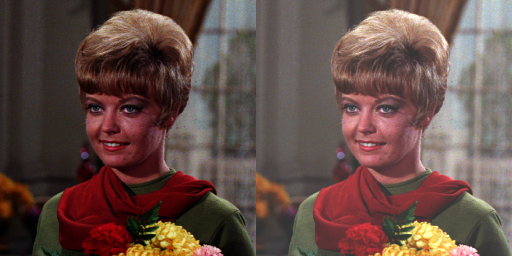

In [6]:
print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)



# TUGAS PRAKTIKUM

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori,

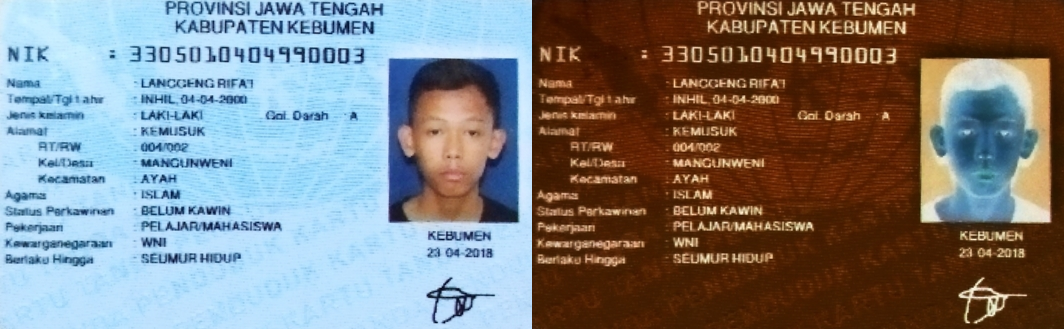

In [8]:
original = cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
inverse_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      inverse_image[y,x,c] = np.clip(255 - original[y,x,c], 0, 255)

#cara simple tanpa for loop
#inverse_image = cv.bitwise_not(original)

final_frame = cv.hconcat((original, inverse_image))
cv2_imshow(final_frame)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan tingkat kecerahan [0 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


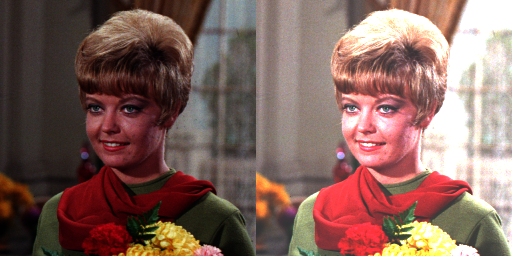

In [9]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan tingkat kecerahan [0 - 255]: '))
  contrast = int(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
contrast_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop menggunakan library openCV
# contrast_image = cv2.convertScaleAbs(original, alpha=contrast, beta=brightness)


final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:

Mengubah tingkat kecerahan citra dengan Transformasi Log
--------------------------------
Masukkan nilai kecerahan: 50


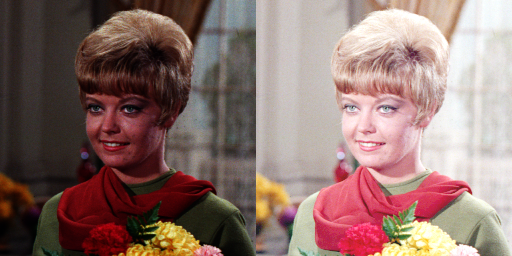

In [11]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/image/female.tiff')
logarithmic_brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      logarithmic_brightness_image[y,x,c] = np.clip(brightness * np.log(1+original[y,x,c]), 0, 255)


final_frame = cv.hconcat((original, logarithmic_brightness_image))
cv2_imshow(final_frame)

4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:


4. a. Averaging


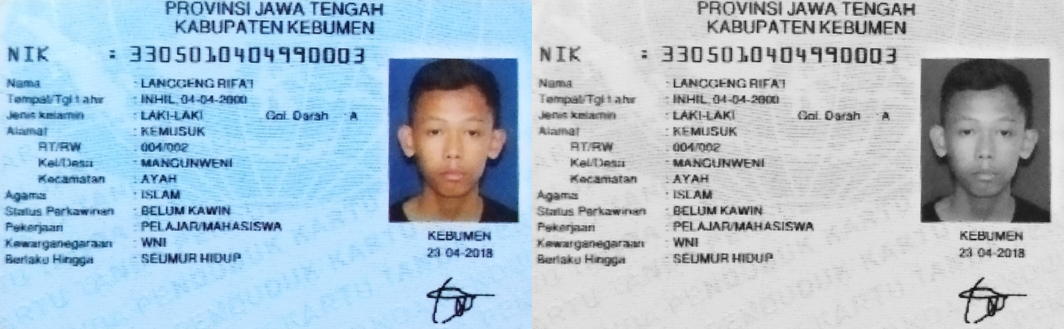

In [26]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
grayAvg_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):

    # hitung rata-rata intensitas warna pada setiap chanel (R,G,B)
    r, g, b = image[y, x]
    gray_value = r/3 + g/3 + b/3

    # menetapkan nilai rata-rata ke setiap chanel pada citra grayscale
    grayAvg_image[y,x] = gray_value


final_frame = cv.hconcat((image, grayAvg_image))
cv2_imshow(final_frame)

4. b. Lighness

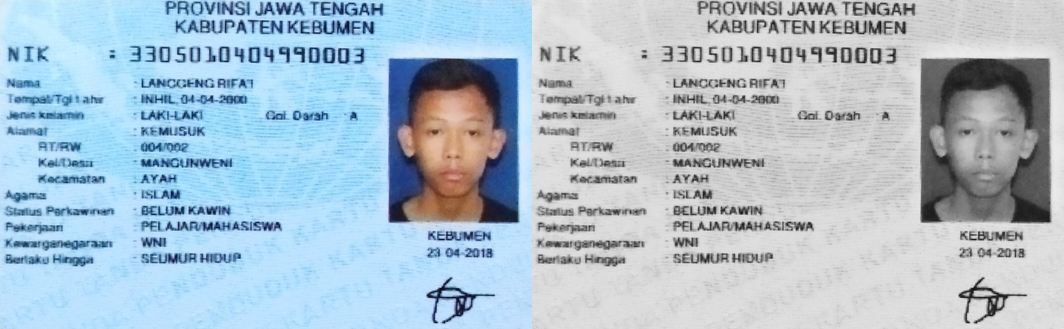

In [25]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
grayLightness_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):

    # mengambil nilai max dan minimum RGB
    r, g, b = image[y, x]
    max_rgb = max(r,g,b)
    min_rgb = min(r,g,b)

    # menghitung nilai ligthness
    lightness = max_rgb//2 + min_rgb//2

    grayLightness_image[y, x] = lightness


final_frame = cv.hconcat((image, grayLightness_image))
cv2_imshow(final_frame)

4. c. Luminance

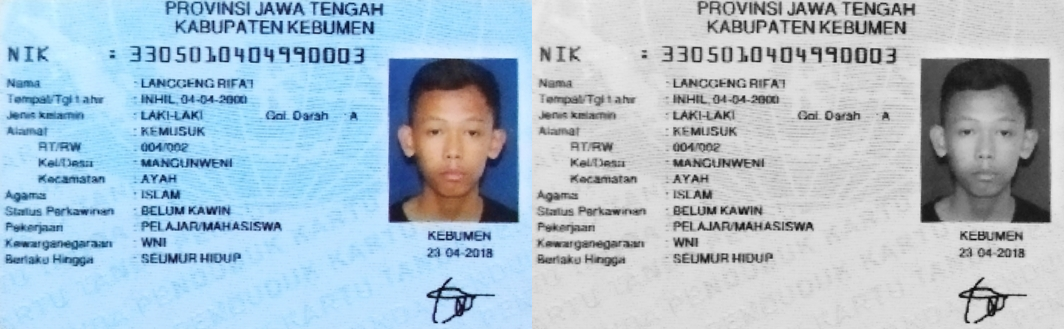

In [28]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
grayLuminance_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      red = image[y,x,2]
      green = image[y,x,1]
      blue = image[y,x,0]

      luminance = 0.21*red + 0.72*green + 0.07*blue
      grayLuminance_image[y,x,c] = np.clip(luminance, 0, 255)


final_frame = cv.hconcat((image, grayLuminance_image))
cv2_imshow(final_frame)

5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

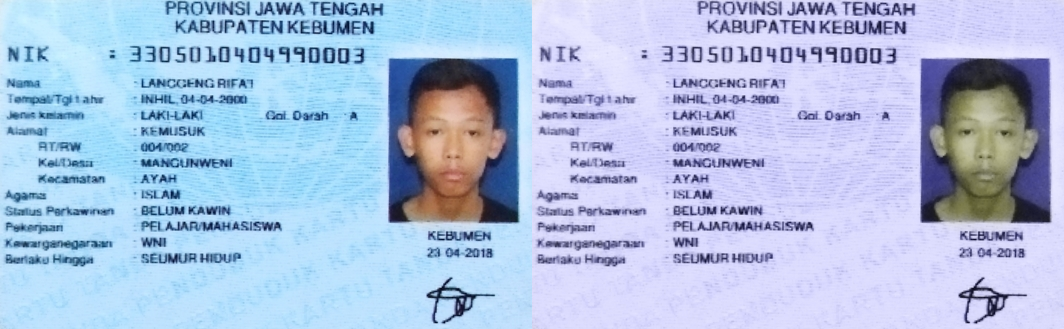

In [30]:
image = cv.imread('/content/drive/MyDrive/PCVK/image/ktp_alfan.jpeg')
grayLuminance_image = np.zeros(image.shape, original.dtype)

for y in range(image.shape[0]):
  for x in range(image.shape[1]):
    for c in range(image.shape[2]):
      red = image[y,x,2]
      green = image[y,x,1]
      blue = image[y,x,0]

      luminance = 0.21*red + 0.72*green + 0.07*blue
      grayLuminance_image[y,x,2] = np.clip(luminance, 0, 255)
      grayLuminance_image[y,x,1] = np.clip(luminance, 0, 255)
      grayLuminance_image[y,x,0] = blue


final_frame = cv.hconcat((image, grayLuminance_image))
cv2_imshow(final_frame)